In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import validation_curve 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv("wineQuality_processed.csv")
data_temp=data
X=data.drop(['quality'],axis=1)
y=data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
X_train_33, X_test_33, y_train_33, y_test_33 = train_test_split(X, y, test_size=0.33, random_state=30)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=30)

In [3]:
#Function to get the test report for each model
def test_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_test)
        return(classification_report(y_test,prediction))
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        return(classification_report(y_test_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        return(classification_report(y_test_33,prediction))
def train_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_train)
        return(classification_report(y_train,prediction))
    if test_size==0.20:
        prediction=model.predict(X_train_20)
        return(classification_report(y_train_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_train_33)
        return(classification_report(y_train_33,prediction))
#Function to get the f1-score,precision
def f_p_r(model,test_size,name):
    global reps
    if test_size==0.20:
        predicts_20=model.predict(X_test_20)
        reps=classification_report(y_test_20,predicts_20,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.20 for ",name," Recall:",recal)
        print("With test_size=0.20 for ",name," f1 score:",f1)
        print("With test_size=0.20 for ",name," precision:",precs)
    if test_size==0.25:
        predicts=model.predict(X_test)
        reps=classification_report(y_test,predicts,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.25 for ",name," Recall:",recal)
        print("With test_size=0.25 for ",name," f1 score:",f1)
        print("With test_size=0.25 for ",name," precision:",precs)
    if test_size==0.33:
        predicts_33=model.predict(X_test_33)
        reps=classification_report(y_test_33,predicts_33,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.33 for ",name," Recall:",recal)
        print("With test_size=0.33 for ",name," f1 score:",f1)
        print("With test_size=0.33 for ",name," precision:",precs)
#Function to get the confusion matrix
def confuse_mat(model,test_size):
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        conmat=confusion_matrix(y_test_20,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.25:
        prediction=model.predict(X_test)
        conmat=confusion_matrix(y_test,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        conmat=confusion_matrix(y_test_33,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
#Function to plot the R0C curve
def roc_auc(model,name,test_size):
    if test_size==0.20:
        ns_probs = [0 for _ in range(len(y_test_20))]
        prediction_probs_20=model.predict_proba(X_test_20)
        prediction_probs_20 = prediction_probs_20[:, 1]
        ns_auc = roc_auc_score(y_test_20, ns_probs)
        lr_auc=roc_auc_score(y_test_20,prediction_probs_20)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_20, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_20,prediction_probs_20)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.25:
        ns_probs = [0 for _ in range(len(y_test))]
        prediction_probs=model.predict_proba(X_test)
        prediction_probs = prediction_probs[:, 1]
        ns_auc = roc_auc_score(y_test, ns_probs)
        lr_auc=roc_auc_score(y_test,prediction_probs)
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test,prediction_probs)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.33:
        ns_probs = [0 for _ in range(len(y_test_33))]
        prediction_probs_33=model.predict_proba(X_test_33)
        prediction_probs_33 = prediction_probs_33[:, 1]
        ns_auc = roc_auc_score(y_test_33, ns_probs)
        lr_auc=roc_auc_score(y_test_33,prediction_probs_33)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_33, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_33,prediction_probs_33)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))

In [4]:
#Gradient Boosting
# Since GB was taking a lot of time to compute. 
# I ran each of the test-sizes separately so as to reduce the computation time.
GB_model=GradientBoostingClassifier()
learning_rate=[0.3,0.5,0.7]
n_estimators=[20,40,70,90]  
max_depth=[2,4,6,10]
min_samples_split=[4,6,10]
min_samples_leaf=[4,6,10]
gb_grid=dict(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
GBClf_20=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)
GBClf_20.fit(X_train_20,y_train_20)
print("GB Model working with test size=0.20")
print("-------------------------------------------")
params_combine_GB_20=pd.concat([pd.DataFrame(GBClf_20.cv_results_["params"]),pd.DataFrame(GBClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",GBClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",GBClf_20.best_score_)
print("--------------------------------------------------------------------------------------") 
'''GBClf_25=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)
GBClf_25.fit(X_train,y_train)
print("GB Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_GB_25=pd.concat([pd.DataFrame(GBClf_25.cv_results_["params"]),pd.DataFrame(GBClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",GBClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",GBClf_25.best_score_)
print("--------------------------------------------------------------------------------------") '''
''' GBClf_33=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)
GBClf_33.fit(X_train_33,y_train_33)
print("GB Model working with test size=0.33")
print("-------------------------------------------")
params_combine_GB_33=pd.concat([pd.DataFrame(GBClf_33.cv_results_["params"]),pd.DataFrame(GBClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",GBClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",GBClf_33.best_score_)
print("--------------------------------------------------------------------------------------") '''

GB Model working with test size=0.20
-------------------------------------------
     learning_rate  max_depth  min_samples_leaf  min_samples_split  \
0              0.3          2                 4                  4   
1              0.3          2                 4                  4   
2              0.3          2                 4                  4   
3              0.3          2                 4                  4   
4              0.3          2                 4                  6   
..             ...        ...               ...                ...   
427            0.7         10                10                  6   
428            0.7         10                10                 10   
429            0.7         10                10                 10   
430            0.7         10                10                 10   
431            0.7         10                10                 10   

     n_estimators  Accuracy  
0              20  0.756593  
1              40 

' GBClf_33=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)\nGBClf_33.fit(X_train_33,y_train_33)\nprint("GB Model working with test size=0.33")\nprint("-------------------------------------------")\nparams_combine_GB_33=pd.concat([pd.DataFrame(GBClf_33.cv_results_["params"]),pd.DataFrame(GBClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)\nprint(params_combine_GB_33)\nprint("-------------------------------------------")\nprint("Best parameter setting with test size=0.33: ",GBClf_33.best_params_)\nprint("Best accuracy score with test size=0.33: ",GBClf_33.best_score_)\nprint("--------------------------------------------------------------------------------------") '

Best GB Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for GB with the best parameter settings with test size=0.20


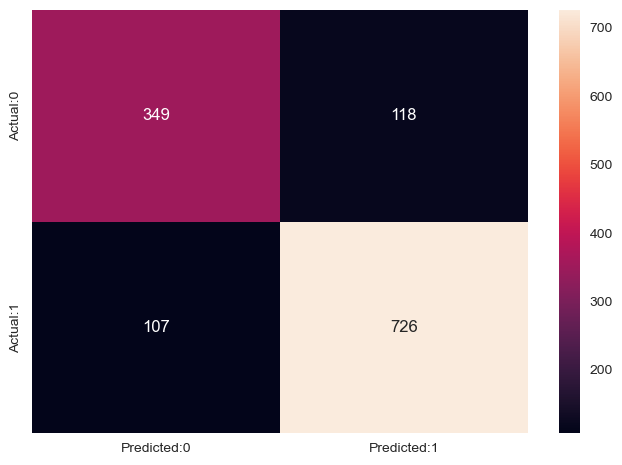

------------------------------------------------------------------
Classification Report for GB model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       467
           1       0.86      0.87      0.87       833

    accuracy                           0.83      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.83      0.83      0.83      1300

------------------------------------------------------------------
Classification Report for GB model with Train with test size=0.20
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1917
           1       1.00      1.00      1.00      3280

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197

---------------------------------------------------------------------------------

'best_gb_33=GradientBoostingClassifier(learning_rate=0.3,max_depth=4,min_samples_leaf=2,min_samples_split=2,n_estimators=70)\ngb_33=best_gb_33.fit(X_train_33,y_train_33)\nprint("Best GB Model working with test size=0.33")\nprint("------------------------------------------------------------------")\nprint("Confusion matrix for GB with the best parameter settings with test size=0.33")\nconfuse_mat(gb_33,0.33)\nprint("------------------------------------------------------------------")\nprint("Classification Report for GB model with Test with test size=0.33")\nreport=test_report(gb_33,0.33)\nprint(report)\nprint("------------------------------------------------------------------")\nprint("Classification Report for GB model with Train with test size=0.33")\ntest_repo=train_report(gb_33,0.33)\nprint(test_repo)\nprint("--------------------------------------------------------------------------------------") '

In [5]:
best_gb_20=GradientBoostingClassifier(learning_rate=0.3,max_depth=10,min_samples_leaf=10,min_samples_split=4,n_estimators=70)
gb_20=best_gb_20.fit(X_train_20,y_train_20)
print("Best GB Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for GB with the best parameter settings with test size=0.20")
confuse_mat(gb_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Test with test size=0.20")
report=test_report(gb_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Train with test size=0.20")
test_repo=train_report(gb_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------") 
'''
best_gb_25=GradientBoostingClassifier(learning_rate=0.3,max_depth=10,min_samples_leaf=10,min_samples_split=4,n_estimators=70)
gb_25=best_gb_25.fit(X_train,y_train)
print("Best GB Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for GB with the best parameter settings with test size=0.25")
confuse_mat(gb_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Test with test size=0.25")
report=test_report(gb_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Train with test size=0.25")
test_repo=train_report(gb_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------") '''
'''best_gb_33=GradientBoostingClassifier(learning_rate=0.3,max_depth=4,min_samples_leaf=2,min_samples_split=2,n_estimators=70)
gb_33=best_gb_33.fit(X_train_33,y_train_33)
print("Best GB Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for GB with the best parameter settings with test size=0.33")
confuse_mat(gb_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Test with test size=0.33")
report=test_report(gb_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for GB model with Train with test size=0.33")
test_repo=train_report(gb_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------") '''



In [6]:
f_p_r(gb_20,0.20,"Gradient Boosting")

With test_size=0.20 for  Gradient Boosting  Recall: 0.8094359799594355
With test_size=0.20 for  Gradient Boosting  f1 score: 0.8110307641915896
With test_size=0.20 for  Gradient Boosting  precision: 0.8127702253263491


ROC curve and AUC score for test_size=0.20


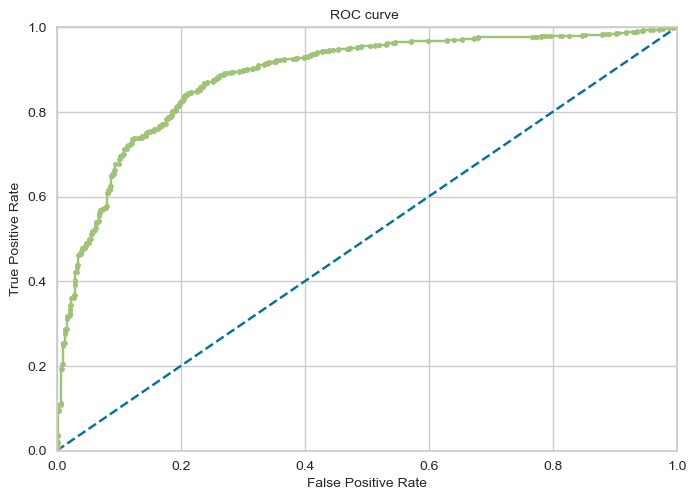

No Skill: ROC AUC=0.500
Gradient Boosting : ROC AUC=0.883


In [7]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(gb_20,"Gradient Boosting",0.20)